In [13]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.preprocessing import image

In [14]:
# Load data & preprocessing
def load_and_preprocess_data(data_dir):
    datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2
    )

    train_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='training'
    )

    validation_generator = datagen.flow_from_directory(
        data_dir,
        target_size=(128, 128),
        batch_size=32,
        class_mode='categorical',
        subset='validation'
    )

    return train_generator, validation_generator


In [15]:
# CNN model
def create_model():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Conv2D(128, (3,3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(4, activation='softmax')  # 4 classes
    ])

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    
    
    return model

Found 901 images belonging to 4 classes.
Found 224 images belonging to 4 classes.


Epoch 1/10
29/29 [==============================] - ETA: 0s - loss: 0.8977 - accuracy: 0.6104

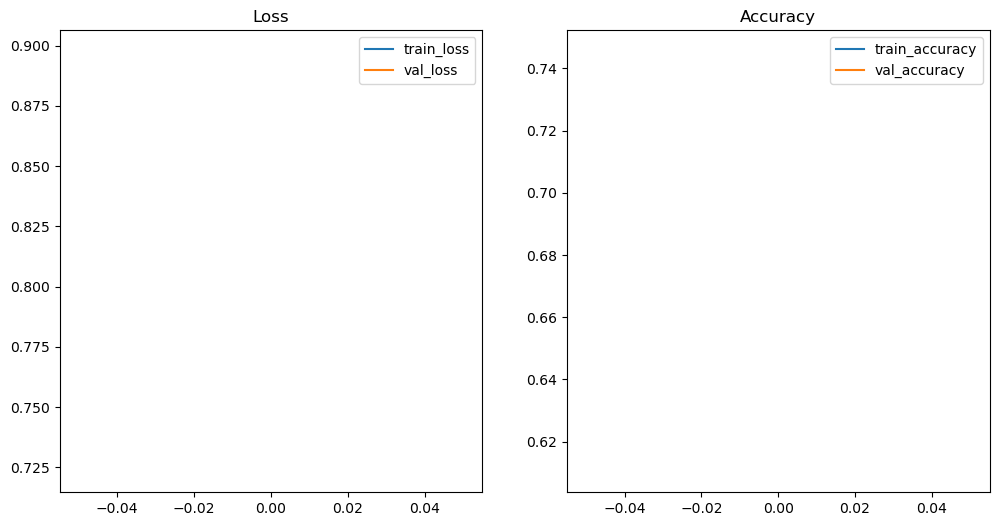

29/29 [==============================] - 10s 322ms/step - loss: 0.8977 - accuracy: 0.6104 - val_loss: 0.7233 - val_accuracy: 0.7455
Epoch 2/10
29/29 [==============================] - ETA: 0s - loss: 0.6402 - accuracy: 0.7636

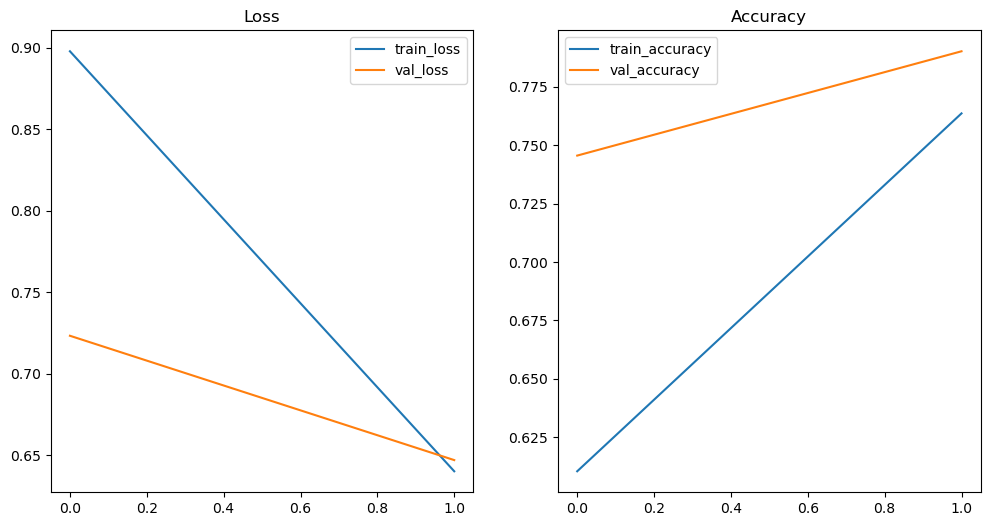

29/29 [==============================] - 9s 303ms/step - loss: 0.6402 - accuracy: 0.7636 - val_loss: 0.6471 - val_accuracy: 0.7902
Epoch 3/10
29/29 [==============================] - ETA: 0s - loss: 0.4860 - accuracy: 0.8335

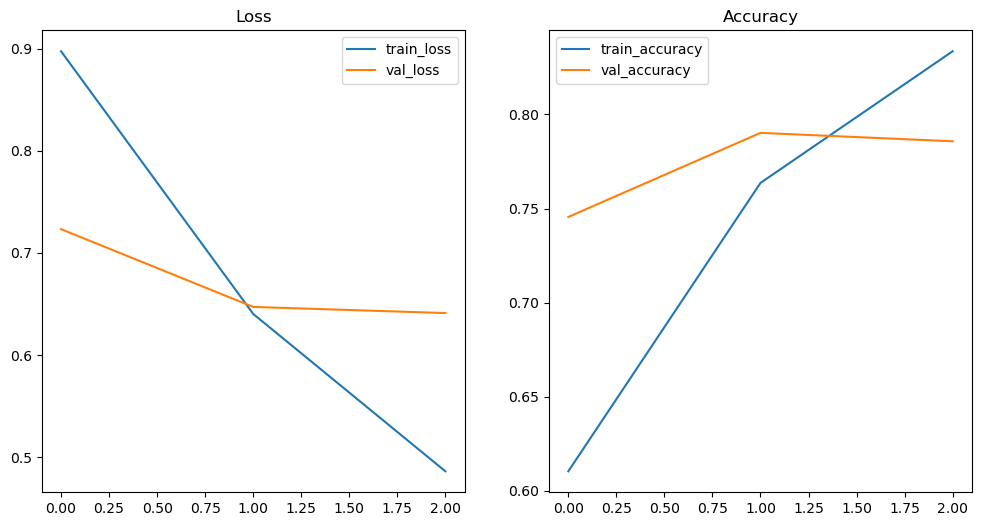

29/29 [==============================] - 9s 308ms/step - loss: 0.4860 - accuracy: 0.8335 - val_loss: 0.6411 - val_accuracy: 0.7857
Epoch 4/10
29/29 [==============================] - ETA: 0s - loss: 0.5015 - accuracy: 0.8180

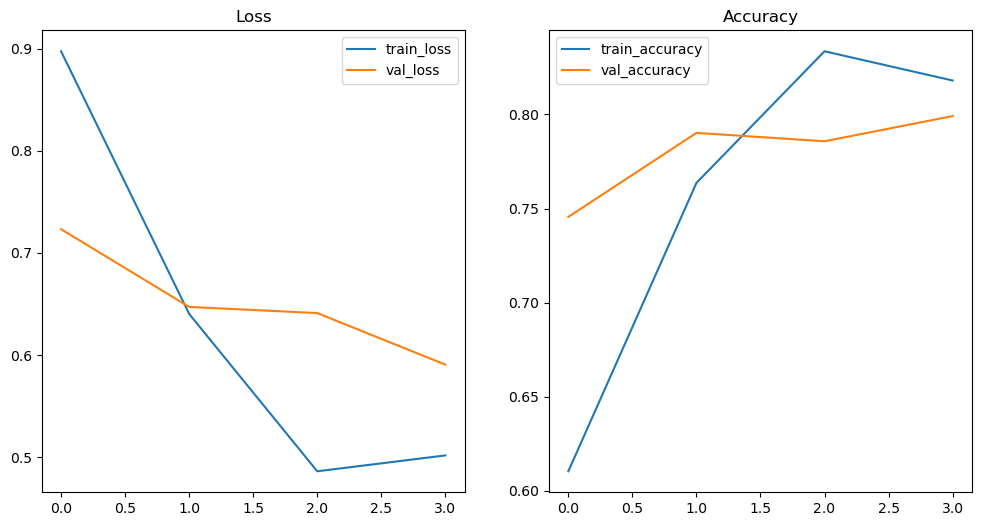

29/29 [==============================] - 9s 312ms/step - loss: 0.5015 - accuracy: 0.8180 - val_loss: 0.5905 - val_accuracy: 0.7991
Epoch 5/10
29/29 [==============================] - ETA: 0s - loss: 0.4579 - accuracy: 0.8380

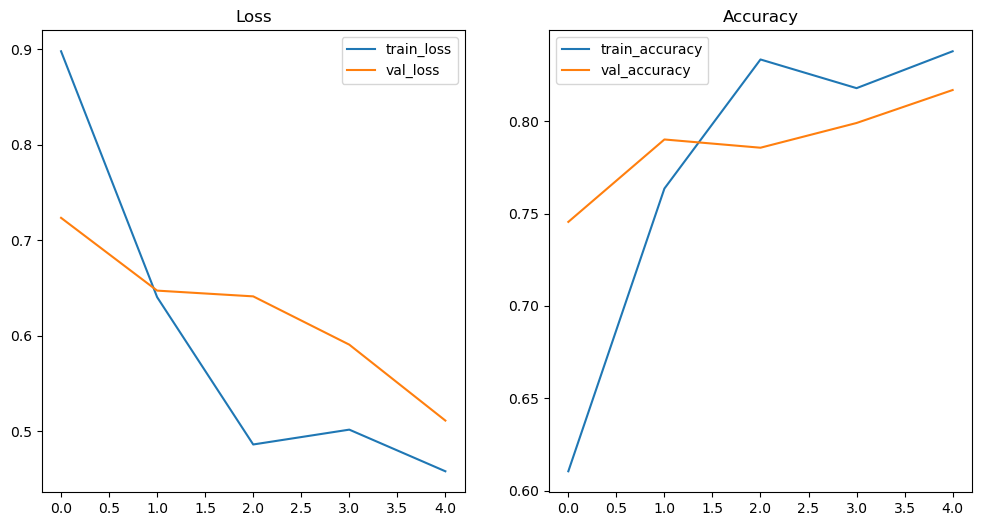

29/29 [==============================] - 9s 305ms/step - loss: 0.4579 - accuracy: 0.8380 - val_loss: 0.5110 - val_accuracy: 0.8170
Epoch 6/10
29/29 [==============================] - ETA: 0s - loss: 0.3984 - accuracy: 0.8446

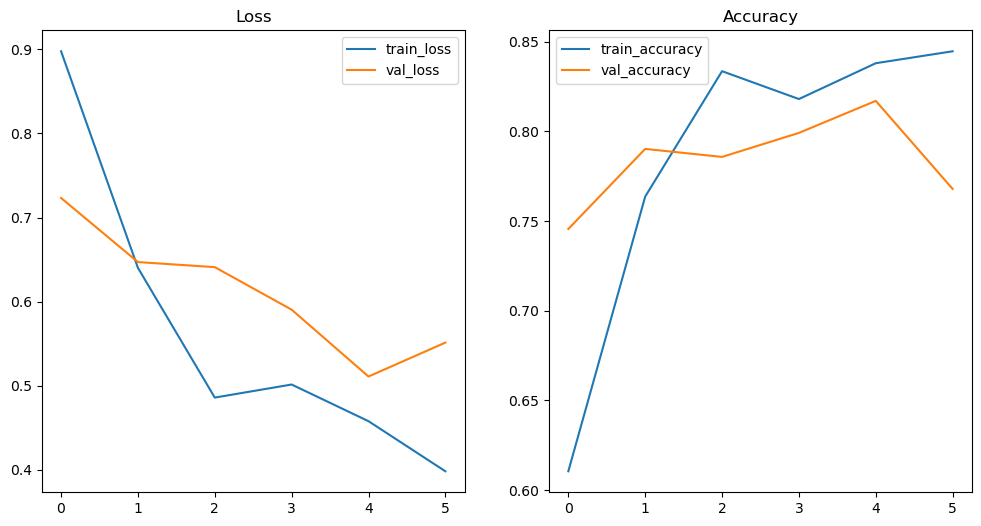

29/29 [==============================] - 9s 302ms/step - loss: 0.3984 - accuracy: 0.8446 - val_loss: 0.5514 - val_accuracy: 0.7679
Epoch 7/10
29/29 [==============================] - ETA: 0s - loss: 0.3810 - accuracy: 0.8657

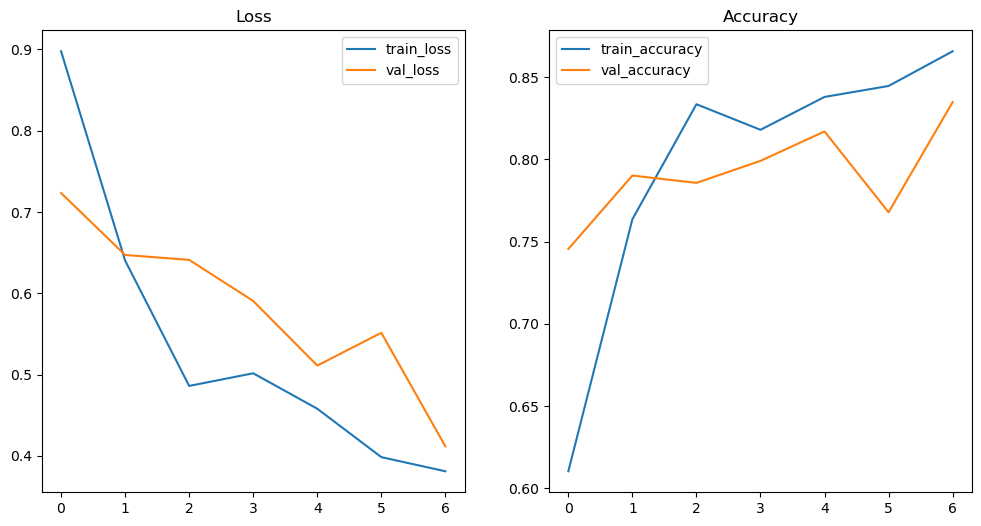

29/29 [==============================] - 9s 302ms/step - loss: 0.3810 - accuracy: 0.8657 - val_loss: 0.4116 - val_accuracy: 0.8348
Epoch 8/10
29/29 [==============================] - ETA: 0s - loss: 0.3344 - accuracy: 0.8724

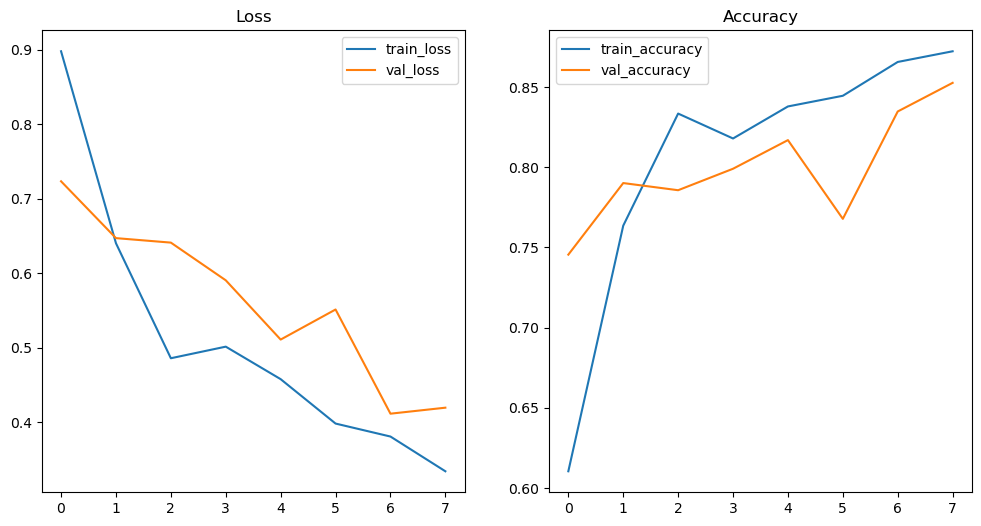

29/29 [==============================] - 9s 302ms/step - loss: 0.3344 - accuracy: 0.8724 - val_loss: 0.4196 - val_accuracy: 0.8527
Epoch 9/10
29/29 [==============================] - ETA: 0s - loss: 0.3323 - accuracy: 0.9001

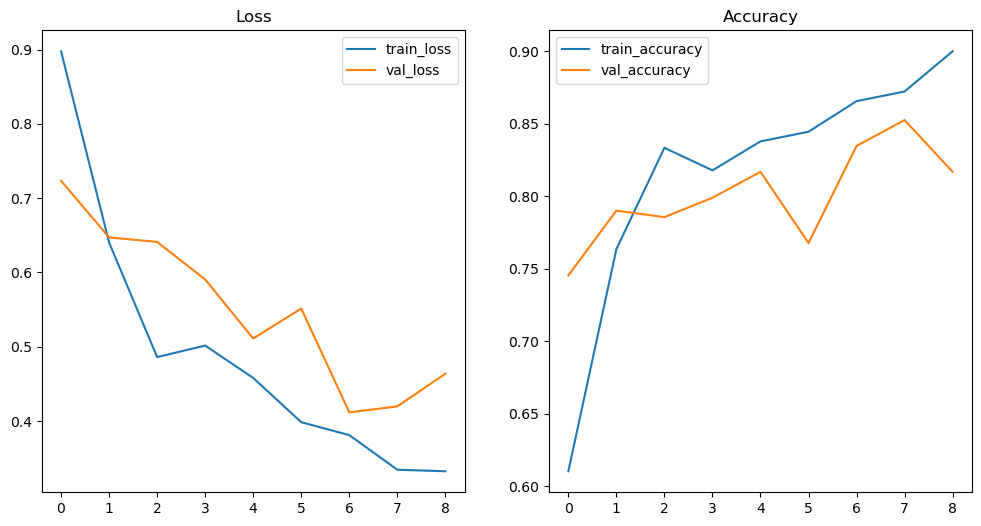

29/29 [==============================] - 9s 308ms/step - loss: 0.3323 - accuracy: 0.9001 - val_loss: 0.4636 - val_accuracy: 0.8170
Epoch 10/10
29/29 [==============================] - ETA: 0s - loss: 0.2775 - accuracy: 0.9046

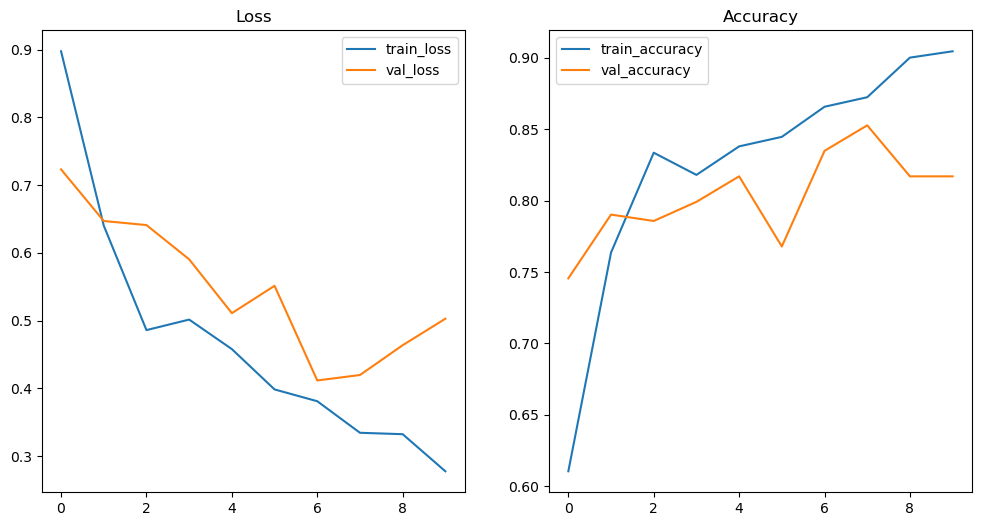

29/29 [==============================] - 9s 299ms/step - loss: 0.2775 - accuracy: 0.9046 - val_loss: 0.5028 - val_accuracy: 0.8170
Epoch 1/10
29/29 [==============================] - ETA: 0s - loss: 0.2656 - accuracy: 0.9079

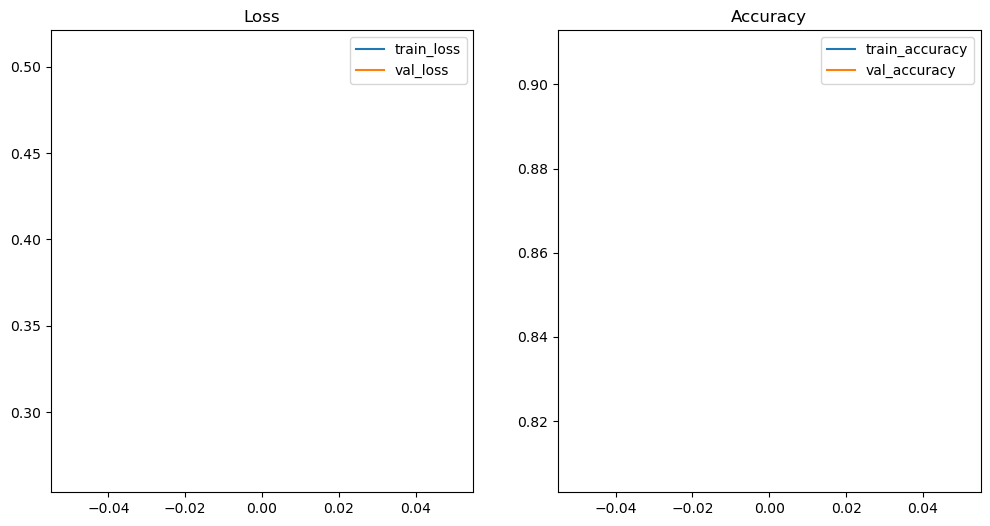


Epoch 1: val_accuracy improved from -inf to 0.80804, saving model to best_model.h5
29/29 [==============================] - 9s 313ms/step - loss: 0.2656 - accuracy: 0.9079 - val_loss: 0.5089 - val_accuracy: 0.8080
Epoch 2/10


c:\Users\ilham\miniconda3\envs\modsim\lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


29/29 [==============================] - ETA: 0s - loss: 0.2920 - accuracy: 0.8935

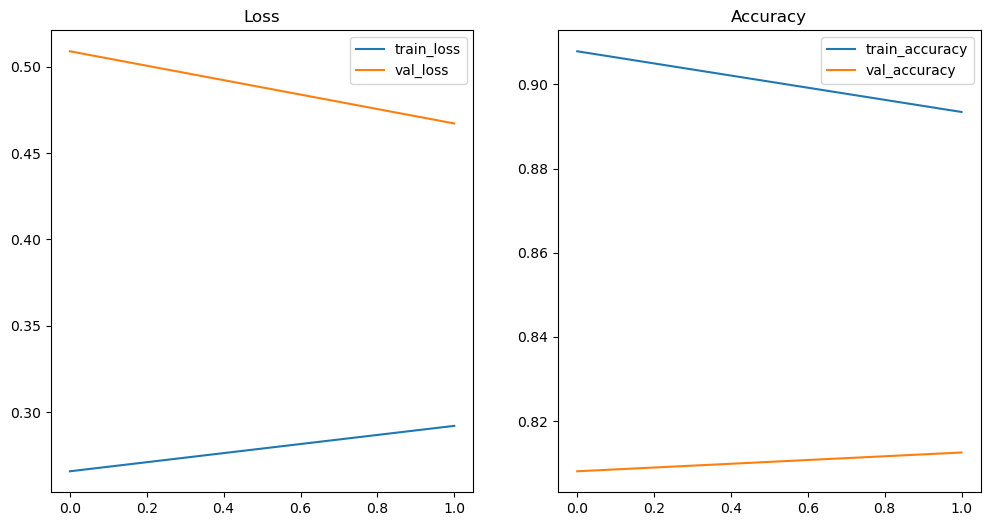


Epoch 2: val_accuracy improved from 0.80804 to 0.81250, saving model to best_model.h5
29/29 [==============================] - 10s 329ms/step - loss: 0.2920 - accuracy: 0.8935 - val_loss: 0.4671 - val_accuracy: 0.8125
Epoch 3/10
29/29 [==============================] - ETA: 0s - loss: 0.2536 - accuracy: 0.9090

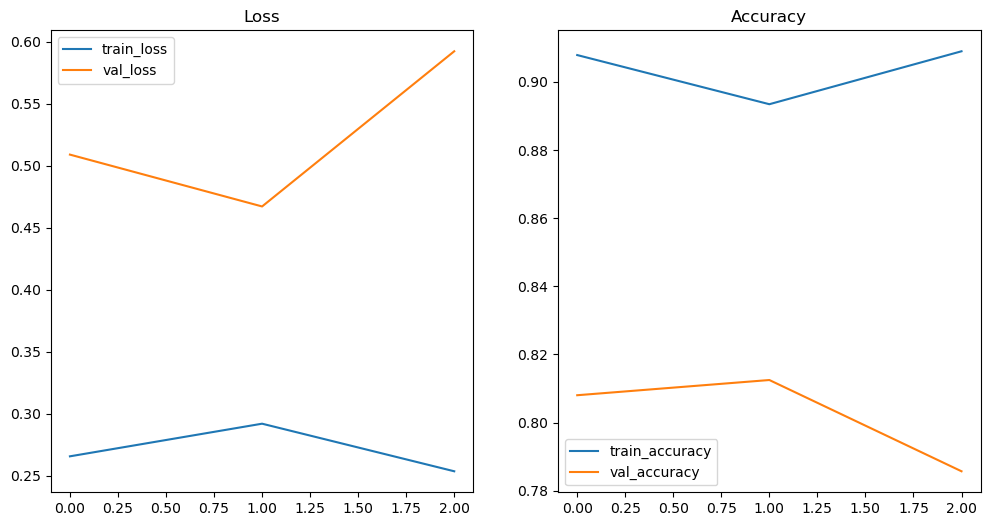


Epoch 3: val_accuracy did not improve from 0.81250
29/29 [==============================] - 9s 317ms/step - loss: 0.2536 - accuracy: 0.9090 - val_loss: 0.5922 - val_accuracy: 0.7857
Epoch 4/10
29/29 [==============================] - ETA: 0s - loss: 0.3172 - accuracy: 0.8846

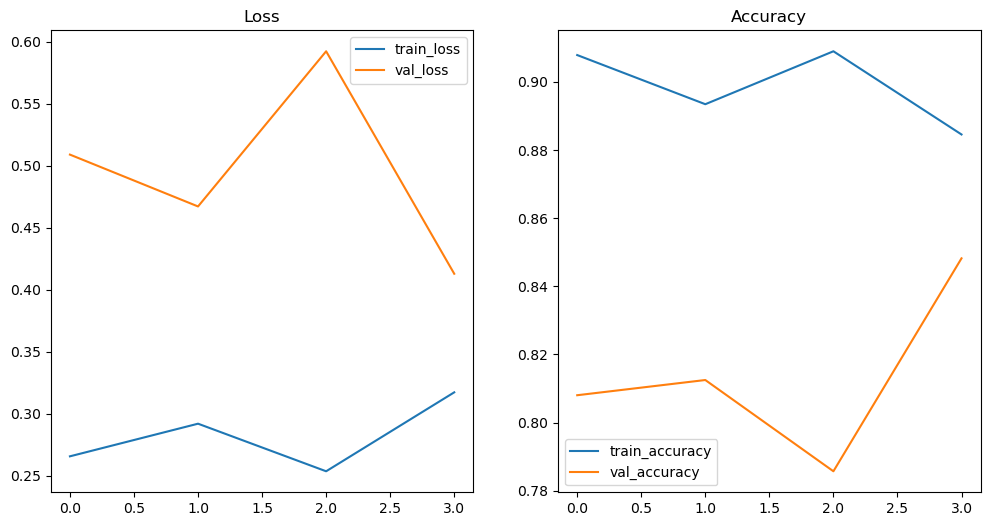


Epoch 4: val_accuracy improved from 0.81250 to 0.84821, saving model to best_model.h5
29/29 [==============================] - 9s 308ms/step - loss: 0.3172 - accuracy: 0.8846 - val_loss: 0.4129 - val_accuracy: 0.8482
Epoch 5/10
29/29 [==============================] - ETA: 0s - loss: 0.3130 - accuracy: 0.8901

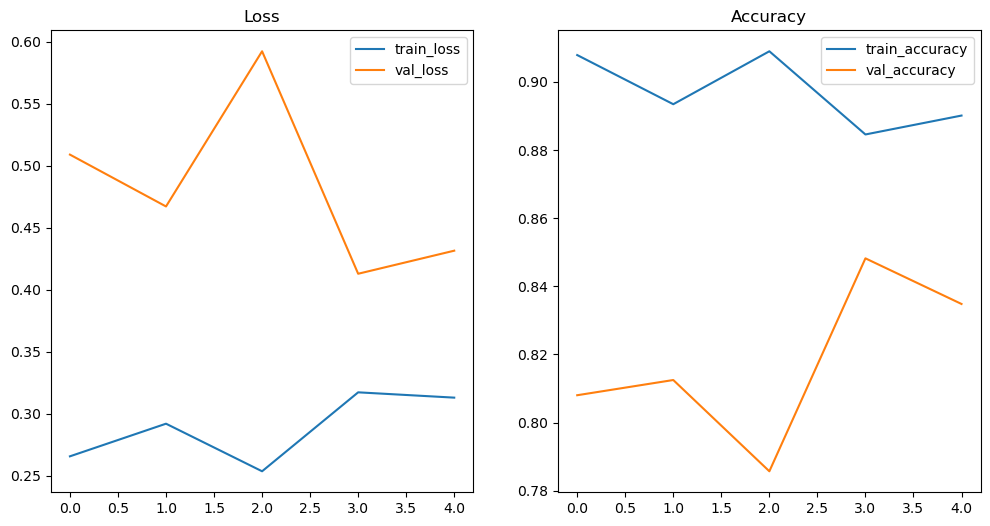


Epoch 5: val_accuracy did not improve from 0.84821
29/29 [==============================] - 9s 319ms/step - loss: 0.3130 - accuracy: 0.8901 - val_loss: 0.4315 - val_accuracy: 0.8348
Epoch 6/10
29/29 [==============================] - ETA: 0s - loss: 0.2505 - accuracy: 0.9201

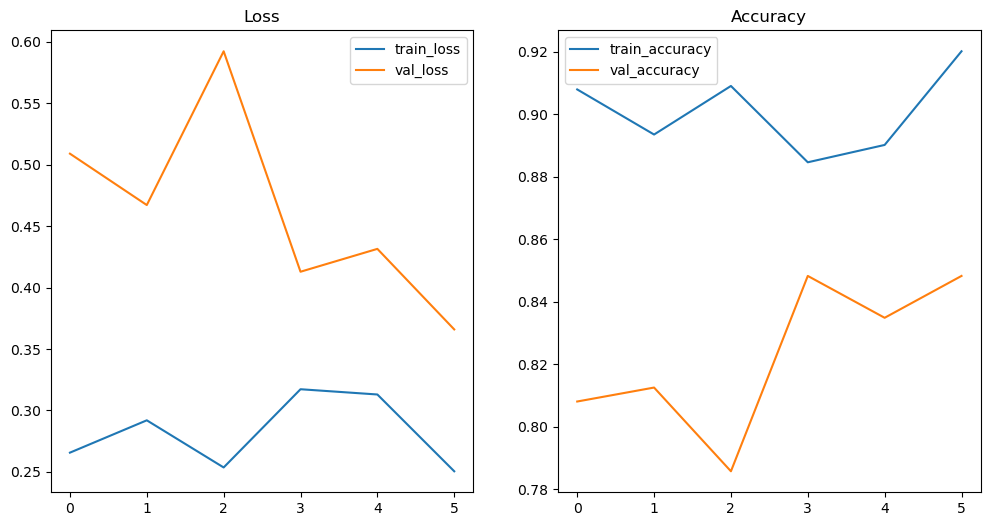


Epoch 6: val_accuracy did not improve from 0.84821
29/29 [==============================] - 9s 305ms/step - loss: 0.2505 - accuracy: 0.9201 - val_loss: 0.3659 - val_accuracy: 0.8482
Epoch 7/10
29/29 [==============================] - ETA: 0s - loss: 0.2441 - accuracy: 0.9168

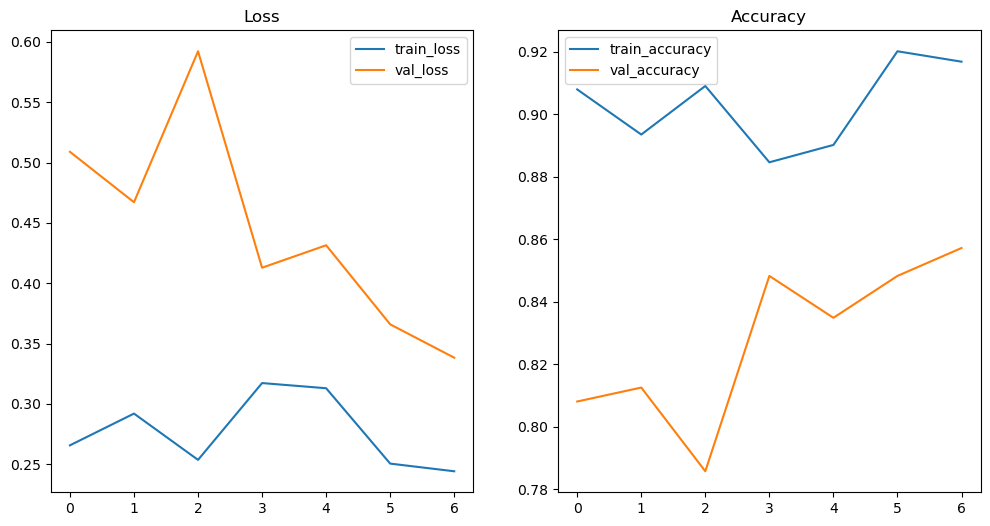


Epoch 7: val_accuracy improved from 0.84821 to 0.85714, saving model to best_model.h5
29/29 [==============================] - 9s 307ms/step - loss: 0.2441 - accuracy: 0.9168 - val_loss: 0.3383 - val_accuracy: 0.8571
Epoch 8/10
29/29 [==============================] - ETA: 0s - loss: 0.2134 - accuracy: 0.9267

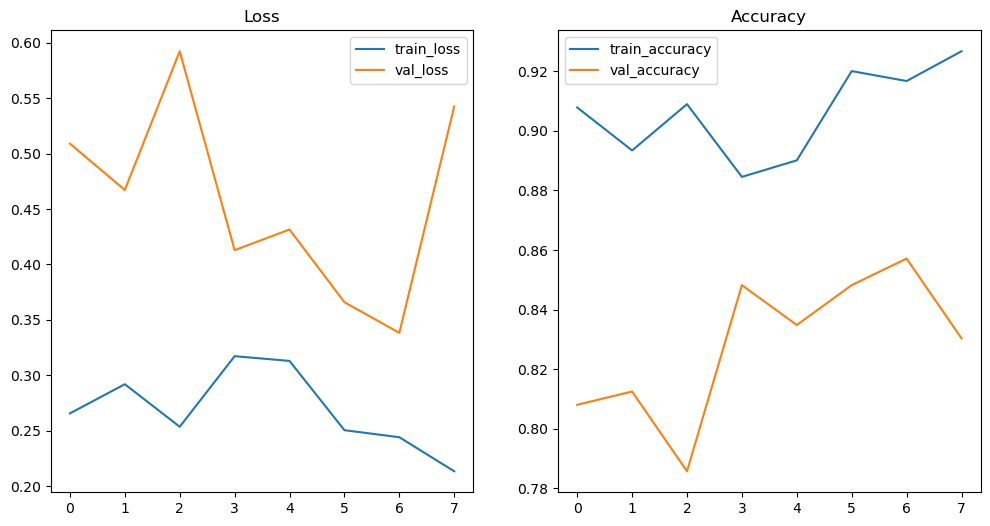


Epoch 8: val_accuracy did not improve from 0.85714
29/29 [==============================] - 9s 319ms/step - loss: 0.2134 - accuracy: 0.9267 - val_loss: 0.5425 - val_accuracy: 0.8304
Epoch 9/10
29/29 [==============================] - ETA: 0s - loss: 0.1746 - accuracy: 0.9390

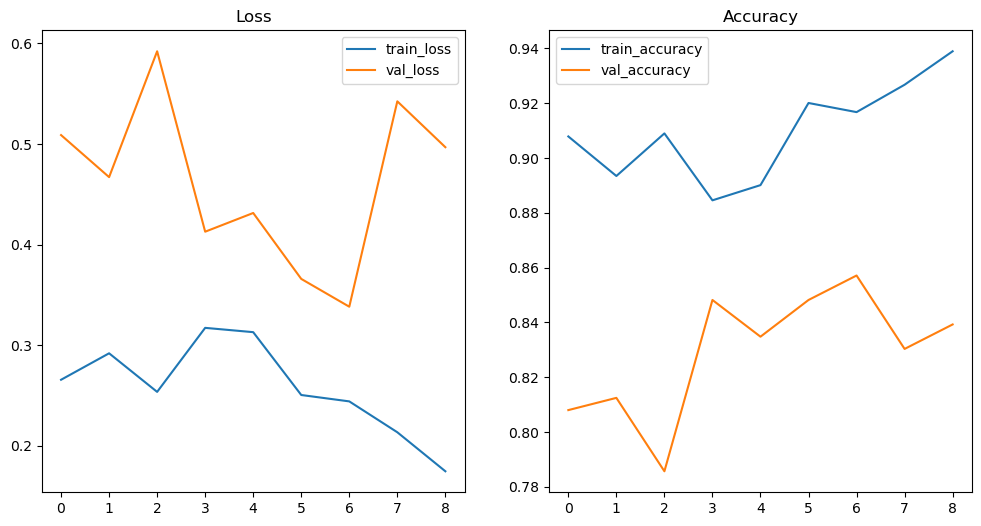


Epoch 9: val_accuracy did not improve from 0.85714
29/29 [==============================] - 9s 311ms/step - loss: 0.1746 - accuracy: 0.9390 - val_loss: 0.4969 - val_accuracy: 0.8393
Epoch 10/10
29/29 [==============================] - ETA: 0s - loss: 0.2904 - accuracy: 0.9001

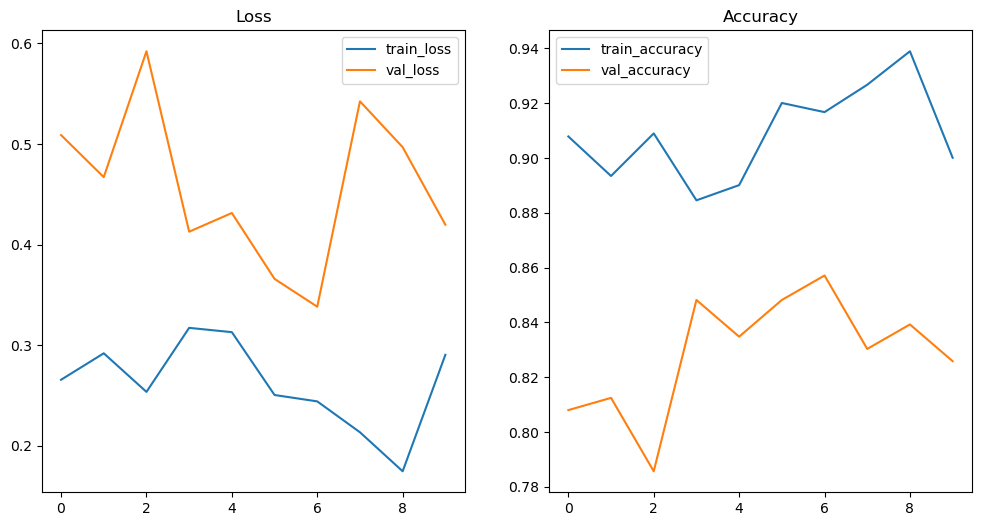


Epoch 10: val_accuracy did not improve from 0.85714
29/29 [==============================] - 9s 310ms/step - loss: 0.2904 - accuracy: 0.9001 - val_loss: 0.4198 - val_accuracy: 0.8259


In [16]:
# Train model
def train_model(model, train_generator, validation_generator, epochs):
    class PlotLosses(tf.keras.callbacks.Callback):
        def on_train_begin(self, logs={}):
            self.losses = []
            self.val_losses = []
            self.acc = []
            self.val_acc = []

        def on_epoch_end(self, epoch, logs={}):
            self.losses.append(logs.get('loss'))
            self.val_losses.append(logs.get('val_loss'))
            self.acc.append(logs.get('accuracy'))
            self.val_acc.append(logs.get('val_accuracy'))

            plt.figure(figsize=(12, 6))
            plt.subplot(1, 2, 1)
            plt.plot(self.losses, label='train_loss')
            plt.plot(self.val_losses, label='val_loss')
            plt.legend()
            plt.title('Loss')

            plt.subplot(1, 2, 2)
            plt.plot(self.acc, label='train_accuracy')
            plt.plot(self.val_acc, label='val_accuracy')
            plt.legend()
            plt.title('Accuracy')

            plt.show()

    
    plot_losses = PlotLosses()

    
    model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[plot_losses]
    )
    
    # Tambahkan callback ModelCheckpoint
    checkpoint = ModelCheckpoint('best_model.h5',
                                 monitor='val_accuracy',
                                 save_best_only=True,
                                 mode='max',
                                 verbose=1)
    
    plot_losses = PlotLosses()

    model.fit(
        train_generator,
        epochs=epochs,
        validation_data=validation_generator,
        callbacks=[plot_losses, checkpoint]
    )


if __name__ == '__main__':
    data_dir = 'dataset2'  
    train_generator, validation_generator = load_and_preprocess_data(data_dir)
    model = create_model()
    train_model(model, train_generator, validation_generator, epochs=10)

In [17]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

# Load the trained model
model = create_model()
model.load_weights('best_model.h5')

# Define class labels
class_labels = ['cloudy', 'rainy', 'shiny', 'sunrise'] 

def test_single_image(image_path):
    img = image.load_img(image_path, target_size=(128, 128))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img /= 255.

    prediction = model.predict(img)
    predicted_class = np.argmax(prediction)

    print(f'Predicted class: {class_labels[predicted_class]}')
    print(f'Confidence: {prediction[0][predicted_class] * 100:.2f}%')

if __name__ == '__main__':
    image_path = 'download.jpeg'  
    test_single_image(image_path)


1/1 [==============================] - 0s 94ms/step
Predicted class: rainy
Confidence: 88.65%
